In [16]:
import os

import mlflow
import mlflow.pyfunc
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import cv2
import matplotlib.pyplot as plt
import numpy as np

TRACKING_URI = "http://127.0.0.1:5000"

# mlflow serverのuriを指定
mlflow.set_tracking_uri(TRACKING_URI)

# boto3経由でminioにアクセスするための設定
os.environ["AWS_ACCESS_KEY_ID"] = "minio"
os.environ["AWS_SECRET_ACCESS_KEY"] = "password"
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://127.0.0.1:9000"

In [11]:
def show_image(image, h, w):
    img = (image.to('cpu').detach().numpy().transpose(1, 2, 0)).astype(np.uint8).copy()   
    img = cv2.resize(img, (w, h))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

In [13]:
# モデルをロード
model_name = "mnist-pytorch"
model_version = 1

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

/Users/t-ibayashi/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pytorch_lightning/core/memory.py:16: LightningDeprecationWarning: `pytorch_lightning.core.memory.get_memory_profile` and `pytorch_lightning.core.memory.get_gpu_memory_map` have been moved to `pytorch_lightning.utilities.memory` since v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/Users/t-ibayashi/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pytorch_lightning/core/memory.py:25: LightningDeprecationWarning: `pytorch_lightning.core.memory.LayerSummary` and `pytorch_lightning.core.memory.ModelSummary` have been moved to `pytorch_lightning.utilities.model_summary` since v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


In [24]:
# データを準備
dataset = MNIST(os.getcwd(), train=True, download=True, 
            transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5, ), (0.5, ))
            ])
        )

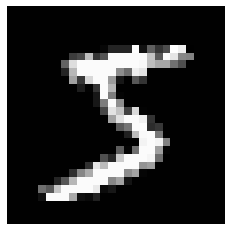

ground truth label: 5
predicted label: 4


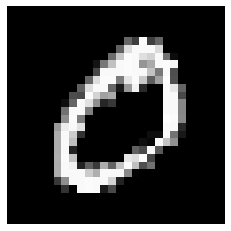

ground truth label: 0
predicted label: 4


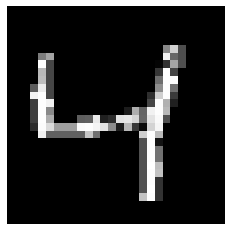

ground truth label: 4
predicted label: 4


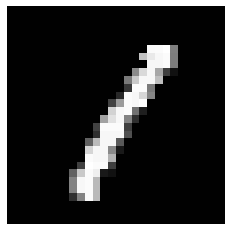

ground truth label: 1
predicted label: 1


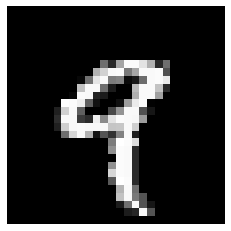

ground truth label: 9
predicted label: 4


In [25]:
# 予測を実行
for i in range(5):
    data, label = dataset.__getitem__(i)
    pred = model.predict(data.numpy())
    pred_label = np.argmax(pred)
    show_image(data*255, 28, 28)
    print(f"ground truth label: {label}")
    print(f"predicted label: {pred_label}")